<h1>Oulier Detection</h1>
<h2>What is an Outlier?</h2>
<p>An outlier is any data point which differs greatly from the rest of the observations in a dataset. Let’s see some real life examples to understand outlier detection:</p>
<ul>
    <li>When one student averages over 90% while the rest of the class is at 70% – a clear outlier</li>
    <li>While analyzing a certain customer’s purchase patterns, it turns out there’s suddenly an entry for a very high value. While most of his/her transactions fall below Rs. 10,000, this entry is for Rs. 1,00,000. It could be an electronic item purchase – whatever the reason, it’s an outlier in the overall data.</li>
</ul>


<h2>How is an outlier introduced to the dataset?</h2>
<p>The Data Science project starts with collection of data and that’s when outliers first introduced to the population. Though, you will not know about the outliers at all in the collection phase. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.</p>

<p>To understand better let us take following small dataset of cricket scores.</p>
<table>
    <tr>
        <th>Player</th>
        <th>Score</th>
    </tr>
     <tr>
        <th>Sachin</th>
        <th>540</th>
    </tr>
     <tr>
        <th>Dravid</th>
        <th>460</th>
    </tr>
     <tr>
        <th>Sehwag</th>
        <th>450</th>
    </tr>
     <tr>
        <th>Ganguly</th>
        <th>408</th>
    </tr>
     <tr>
        <th>Virat</th>
        <th>520</th>
    </tr>
     <tr>
        <th>Laxman</th>
        <th>40</th>
    </tr>
     <tr>
        <th>Gambhir</th>
        <th>432</th>
    </tr>
</table>



<p>As you can see from the above collected data that all other players scored 400+ except Laxman who scored 40. This figure can be just a typing mistake or it is showing the variance in your data and indicating that Laxman is performing very bad so, needs improvements.</p>

<p>Now that we know outliers can either be a mistake or just variance, how would you decide if they are important or not. Well, it is pretty simple if they are the result of a mistake, then we can ignore them, but if it is just a variance in the data we would need think a bit further. </p>

## Identifying outliers

There are various methods for identifying outliers in a dataset, such as:

- Visual inspection of data plots.
- Statistical tests based on assumptions about the data distribution and variability.

<h2>Finding Outliers</h2>
<p>For this implementation we will use <a href="https://www.kaggle.com/c/boston-housing/data">Boston House Price</a> Dataset.</p>

<strong>Importing useful modules</strong>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from scipy import stats
import numpy as np
plt.rcParams['figure.figsize']=(4,4)

<strong>Visualizing the dataset</strong>

In [8]:
boston_df = pd.read_csv("BostonHousePricingDataset.csv")

#dropping the target column as the anomaly detection will be conducted on features
boston_df.drop(columns=["medv"], inplace = True)

boston_df.head()

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


<p>There are two types of analysis we will follow to find the outliers- Uni-variate(one variable outlier analysis) and Multi-variate(two or more variable outlier analysis)</p>

<h2>Discover outliers with visualization tools</h2>
<h3>Box plot</h3>
<p>In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.</p>

<p>Above definition suggests, that if there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. Let’s try and see it ourselves.</p>

<AxesSubplot:xlabel='dis'>

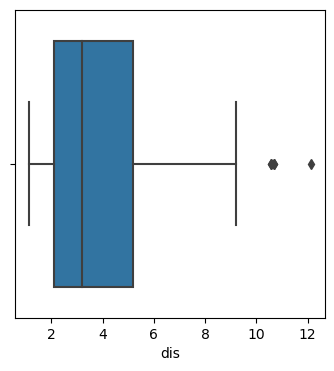

In [9]:
sns.boxplot(x=boston_df['dis'])

<p>Above plot shows one point greater than 10. this is an outlier as it is not included in the box of other observation i.e no where near the quartiles. </p>

<AxesSubplot:xlabel='zn'>

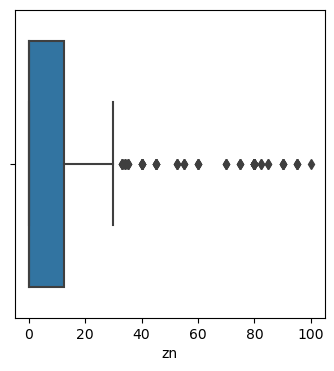

In [10]:
sns.boxplot(x=boston_df['zn'])

<p>This plot shows quite a few values not included in the box. some values are far away white others are close to whiskers.</p>

<p>Here we analysed Uni-variate outlier i.e. we used DIS column and zn column indivisually to check the outlier. But we can do multivariate outlier analysis too. </p>

<h3>Scatter Plot</h3>
<p>A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.</p>
<p>As the definition suggests, the scatter plot is the collection of points that shows values for two variables. We can try and draw scatter plot for two variables from our housing dataset.</p>

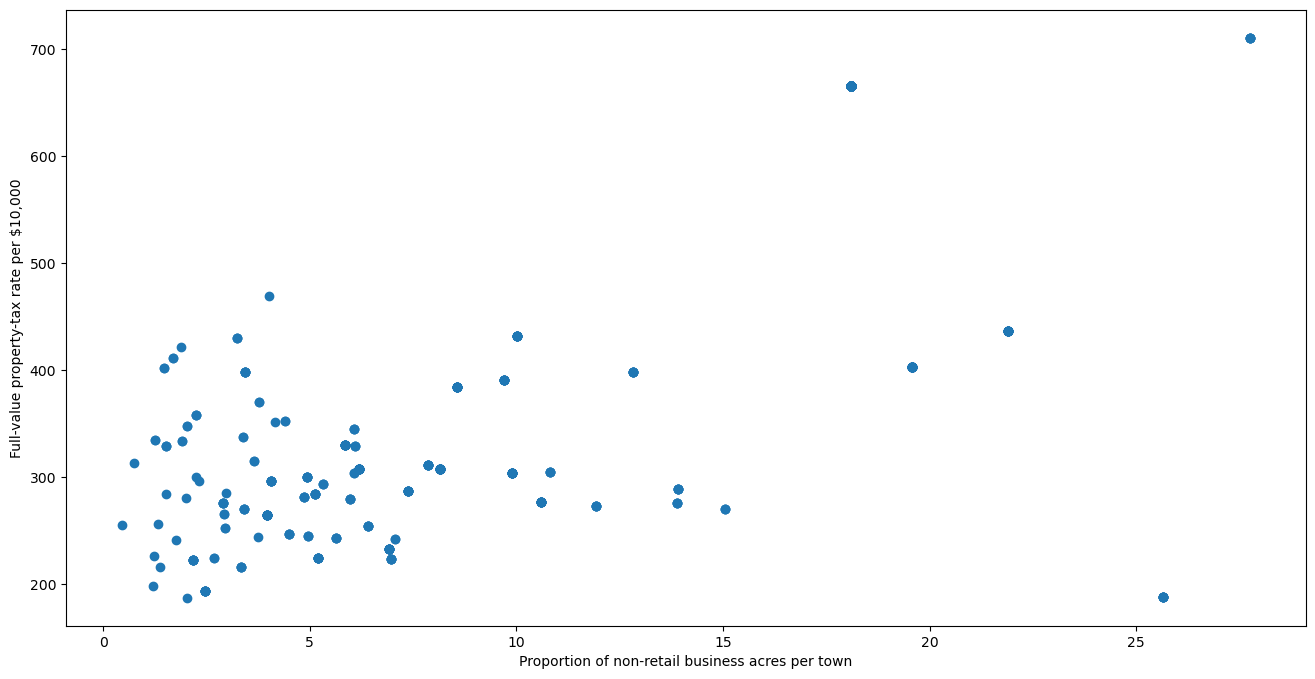

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['indus'], boston_df['tax'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

<p>Looking at the plot above, we can say that most of data points are lying bottom left side but there are points which are far from the population like top right corner.</p>

<h2>Discover outliers with mathematical function</h2>
<h3>Z-Score</h3>

<p>
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.</p>
</p>The intuition behind Z-score is to describe any data point by finding its relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.</p>
<p>while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.</p>

<p>We will use Z-score function defined in scipy library to detect the outliers.</p>

In [39]:
z_scores = np.abs(stats.zscore(boston_df))
z_scores

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.728631,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562
1,1.721785,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439
2,1.714939,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727
3,1.708093,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517
4,1.701247,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.701247,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147
502,1.708093,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850
503,1.714939,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048
504,1.721785,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302


<p>To have a better look at the outliers we will use threshold.</p>

In [29]:
#show only those values having z_scores > threshold
threshold = 3

outliers = np.where(z_scores > threshold)

print(outliers)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 2,  2,  2, 12, 13,  4,  4,  4,  4,  4,  4,  4,  2,  2,  2,  2,  2,
        2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,  4,  4,  2,  6,
        6,  4,  4,  4,  4,  4,  4,  2,  4,  2,  2,  8,  8,  2,  8,  8,  8,
        4,  4,  4,  4,  4,  6,  6,  6,  4,  4,  4, 13,  6, 13,  1,  1,  1,
        1,  6,  1, 12, 12, 12, 13,  1, 13, 12, 12,  1, 12, 12, 12, 12, 12,
       12,  1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

***The first array contains the list of row numbers and second array respective column numbers.***

To access a particular record we can use simple python code as follows:

In [40]:
z_scores.iloc[55, 2]

3.375038763517294

In [33]:
boston_df.iloc[55, 2]

90.0

In [36]:
# Print the outliers
for i, j in zip(outliers[0], outliers[1]):
    print(f"Outlier found at row ({i}) and column ({j}): {boston_df.iloc[i, j]}")

Outlier found at row (55) and column (2): 90.0
Outlier found at row (56) and column (2): 85.0
Outlier found at row (57) and column (2): 100.0
Outlier found at row (102) and column (12): 70.8
Outlier found at row (141) and column (13): 34.41
Outlier found at row (142) and column (4): 1
Outlier found at row (152) and column (4): 1
Outlier found at row (154) and column (4): 1
Outlier found at row (155) and column (4): 1
Outlier found at row (160) and column (4): 1
Outlier found at row (162) and column (4): 1
Outlier found at row (163) and column (4): 1
Outlier found at row (199) and column (2): 95.0
Outlier found at row (200) and column (2): 95.0
Outlier found at row (201) and column (2): 82.5
Outlier found at row (202) and column (2): 82.5
Outlier found at row (203) and column (2): 95.0
Outlier found at row (204) and column (2): 95.0
Outlier found at row (208) and column (4): 1
Outlier found at row (209) and column (4): 1
Outlier found at row (210) and column (4): 1
Outlier found at row 

<p>z_scores.iloc[55, 2] means that 55th record on 2nd column is having z value of 3.375.</p>
<p>And if we go by conventions then this value is an outlier and must be dealt with properly.</p>

<h3>IQR (interquartile range)</h3>

<p>Another robust method for labeling outliers is the IQR (interquartile range) method of outlier detection developed by John Tukey, the pioneer of exploratory data analysis. Box plot use the IQR method to display data and outliers.</p>

<p>A box-and-whisker plot uses quartiles (points that divide the data into four groups of equal size) to plot the shape of the data. The box represents the 1st and 3rd quartiles, which are equal to the 25th and 75th percentiles. The line inside the box represents the 2nd quartile, which is the median.</p>

<p>The interquartile range is the range between the first and the third quartiles (the edges of the box). Tukey considered any data point that fell outside of either 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile to be “outside” or “far out”. In a classic box-and-whisker plot, the ‘whiskers’ extend up to the last data point that is not “outside”.</p>

<p>IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.</p>

<p>Let’s find out how we can find the list of outliers with IQR as we did using Z-score calculation. First we will calculate IQR</p>



In [12]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id         252.500000
crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
dtype: float64


<p>These are the IQR for each column.</p>
<p>Now we will catch outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.</p>

In [13]:
print(boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))

        id   crim     zn  indus   chas    nox     rm    age    dis    rad  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

       tax  ptratio      b  lstat  
0    False    False  False  False  
1  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [47]:
outliers = np.where((boston_df < Q1 - 1.5 * IQR) | (boston_df > Q3 + 1.5 * IQR))

# Print the outliers
for i, j in zip(outliers[0], outliers[1]):
    print(f"Outlier found at row ({i}) and column ({j}): {boston_df.iloc[i, j]}")

Outlier found at row (18) and column (12): 288.99
Outlier found at row (25) and column (12): 303.42
Outlier found at row (27) and column (12): 306.38
Outlier found at row (32) and column (12): 232.6
Outlier found at row (34) and column (12): 248.31
Outlier found at row (39) and column (2): 75.0
Outlier found at row (40) and column (2): 75.0
Outlier found at row (54) and column (2): 75.0
Outlier found at row (55) and column (2): 90.0
Outlier found at row (56) and column (2): 85.0
Outlier found at row (57) and column (2): 100.0
Outlier found at row (65) and column (2): 80.0
Outlier found at row (66) and column (2): 80.0
Outlier found at row (97) and column (6): 8.069
Outlier found at row (98) and column (6): 7.82
Outlier found at row (102) and column (12): 70.8
Outlier found at row (118) and column (12): 338.63
Outlier found at row (134) and column (12): 262.76
Outlier found at row (141) and column (13): 34.41
Outlier found at row (142) and column (4): 1
Outlier found at row (145) and co

<h2>Dealing with Outliers</h2>
<p><strong>1. Using Z-Score</strong></p>

In [48]:
boston_df_edited_z = boston_df[(z < 3).all(axis=1)]
#keeping only those values in boston_df_edited where z score is lower than 3.

In [49]:
boston_df.shape

(506, 14)

In [50]:
boston_df_edited_z.shape

(415, 14)

<p>As we can see that by this way we removed 91 records which were outliers.</p>

<p><strong>2. Using IQR</strong></p>

In [52]:
#keeping only values
boston_df_edited_IQR = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
boston_df_edited_IQR.shape

(274, 14)

<p>This method removed 232 records</p>


<p><strong>But this mehod of data removal should not be followed always.</strong></p>
<p>Before removing any value we should carefully examine whether it is a genune oulier or a case of variance</p>
<p><strong>Note: </strong>bad data, wrong calculation, these can be identified as Outliers and should be dropped but at the same time you might want to correct them too, as they change the level of data i.e. mean which cause issues when you model your data. For ex- 5 people get salary of 10K, 20K, 30K, 40K and 50K and suddenly one of the person start getting salary of 100K. Consider this situation as, you are the employer, the new salary update might be seen as biased and you might need to increase other employee’s salary too, to keep the balance. So, there can be multiple reasons you want to understand and correct the outliers.</p>

# Drop an outlier if:

- You know that it’s wrong. For example, if you have a really good sense of what range the data should fall in, like people’s ages, you can safely drop values that are outside of that range.

- You have a lot of data, so your sample won’t be hurt by dropping a questionable outlier.

- You can go back and recollect or verify the questionable data point.


# Don’t drop an outlier if:

- Your results are critical, so even small changes will matter a lot. For example, you can feel better about dropping outliers about people’s favorite TV shows, not about the temperatures at which airplane seals fail.

- There are a lot of outliers. Outliers are rare by definition. If, for example, 30% of your data is outliers, then it actually means that there’s something interesting going on with your data that you need to look further into.

# Other methods to handle a data set with outliers

- Trim the data set, but replace outliers with the nearest “good” data, as opposed to truncating them completely. (This called Winsorization.) For example, if you thought all data points above the 95th percentile were outliers, you could set them to the 95th percentile value.

- Replace outliers with the mean or median (whichever better represents for your data) for that variable to avoid a missing data point.

# If you keep outliers:

- Run and publish two analyses, one with the outliers and one without. Being transparent in the final report is a great way to make sure that your final analysis is reliable.

- Separate the outliers from your data and run different analyses. (This is relevant when outliers are grouped.) For example, if you’re looking at people’s charitable giving relative to their income, you might find some super high Bill Gates or Warren Buffet-level outliers. Including these in your analysis of the average person’s charitable giving would skew your results. In that case, separate out the super high-income people from the rest, and run analyses separately.

<table class="MsoTableGrid" border="1" cellspacing="0" cellpadding="0" style="border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt">
 <tbody><tr style="mso-yfti-irow:0;mso-yfti-firstrow:yes">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center"><b><span lang="EN-US" style="mso-ansi-language:EN-US">Classifier<o:p></o:p></span></b></p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center"><b><span lang="EN-US" style="mso-ansi-language:EN-US">Sensitive to Outliers<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:1">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Naïve Bayes</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Not Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:2">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Support Vector
  Machine</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Not Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:3">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Linear Regression</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:4">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Logistic Regression</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:5">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Decision Tree (Regressor
  or Classifier)</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Not Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:6">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Ensemble(RF,XGboost,GB)</p>
  </td>
  
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Not Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:7">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">k-Nearest Neighbor
  (k-NN)</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Not Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:8">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">k-means</p>
  </td>
  
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:9">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Hierarchical</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:10">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Principal Component
  Analysis (PCA)</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Sensitive</p>
  </td>
 </tr>
 <tr style="mso-yfti-irow:11;mso-yfti-lastrow:yes">
  <td width="312" valign="top" style="width:233.75pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Neural Networks
  (NN)</p>
  </td>
  <td width="312" valign="top" style="width:233.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt">
  <p class="MsoNormal" align="center" style="text-align:center">Sensitive</p>
  </td>
 </tr>
</tbody></table>